# 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r"C:\Users\sumod\OneDrive\Desktop\pythonnotes\Titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
df=df.drop(["Cabin","Name","Ticket","PassengerId"],axis=1,inplace=True)

In [ ]:
df=df["Age"].fillna(df["Age"].median(),inplace=True)

In [ ]:
df=df.dropna(inplace=True)

<Axes: >

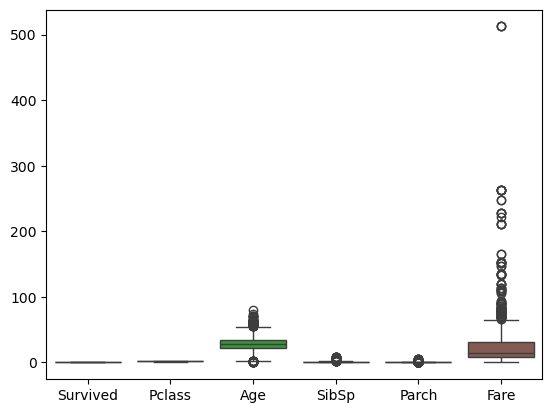

In [11]:
sns.boxplot(df)

In [84]:
# q1=df["Fare"].quantile(0.25)
# q3=df["Fare"].quantile(0.75)
# iqr=q3-q1
# lower_bound=q1 - 1.5*iqr
# upp_bound=q3 + 1.5*iqr
# print("lower",lower_bound)
# print("upper",upp_bound)
# outlier=df[(df["Fare"]<lower_bound) & (df["Fare"]>upp_bound)]
# outlier

In [81]:
q1=df["Fare"].quantile(0.25)
q3=df["Fare"].quantile(0.75)
iqr=q3-q1
lower_bound=q1 - 1.5*iqr
upp_bound=q3 + 1.5*iqr
print("lowerbound:",lower_bound,"upperbound:",upp_bound)
fare_outlier=df[(df["Fare"]<lower_bound)|(df["Fare"]>upp_bound)]
fare_outlier

lowerbound: -16.485499999999995 upperbound: 48.531299999999995


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
3,1.0,1.0,0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
6,0.0,1.0,1,54.0,0.0,0.0,51.8625,0.0,0.0,1.0
35,0.0,1.0,1,42.0,1.0,0.0,52.0000,0.0,0.0,1.0
54,0.0,1.0,1,65.0,0.0,1.0,61.9792,1.0,0.0,0.0
74,1.0,3.0,1,32.0,0.0,0.0,56.4958,0.0,0.0,1.0
92,0.0,1.0,1,46.0,1.0,0.0,61.1750,0.0,0.0,1.0
97,1.0,1.0,1,23.0,0.0,1.0,63.3583,0.0,0.0,1.0
110,0.0,1.0,1,47.0,0.0,0.0,52.0000,0.0,0.0,1.0
137,0.0,1.0,1,37.0,1.0,0.0,53.1000,1.0,0.0,0.0
155,0.0,1.0,1,51.0,0.0,1.0,61.3792,0.0,0.0,1.0


<Axes: >

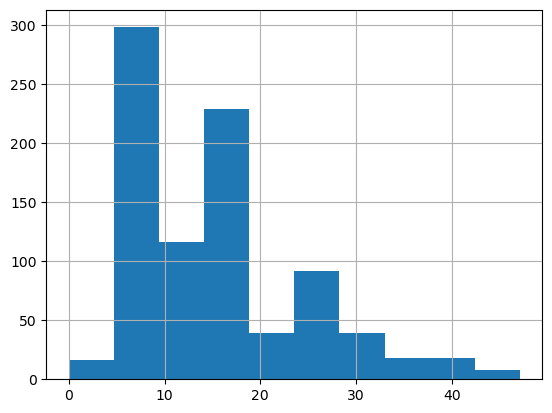

In [93]:
df["Fare"].hist()

In [82]:
df["Fare"]=np.where((df["Fare"]<lower_bound) | (df["Fare"]>upp_bound),
                    df["Fare"].median(),df["Fare"])

In [85]:
df["Age_zscore"]=stats.zscore(df["Age"])
outlier=df[abs(df["Age_zscore"])>3]
outlier

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Age_zscore


In [86]:
df.drop(outlier.index,inplace=True)

In [89]:
df.drop("Age_zscore",axis=1,inplace=True)
df.shape

(873, 10)

<Axes: >

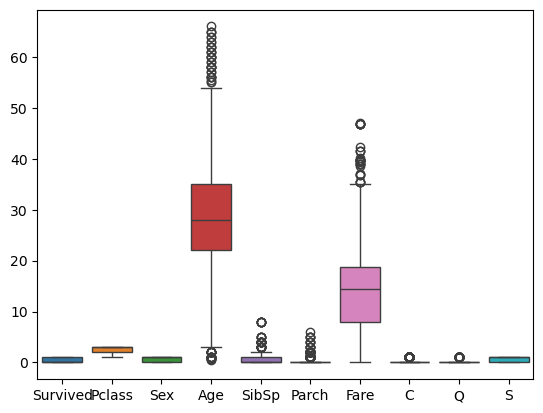

In [90]:
sns.boxplot(df)

In [91]:
encoder= OneHotEncoder()
emb_data=encoder.fit_transform(df[["Embarked"]]).toarray()
emb_df=pd.DataFrame(emb_data,columns=encoder.categories_[0])
df=pd.concat([df,emb_df],axis=1)
df.head()

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [95]:
lb_sex= LabelEncoder()
df["Sex"]=lb_sex.fit_transform(df["Sex"])

In [96]:
df.drop(["Embarked"],axis=1,inplace=True)

KeyError: "['Embarked'] not found in axis"

In [97]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0.0,3.0,1,22.0,1.0,0.0,7.2500,0.0,0.0,1.0
1,1.0,1.0,0,38.0,1.0,0.0,14.4542,1.0,0.0,0.0
2,1.0,3.0,0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,0,35.0,1.0,0.0,14.4542,0.0,0.0,1.0
4,0.0,3.0,1,35.0,0.0,0.0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
877,0.0,3.0,1,19.0,0.0,0.0,7.8958,0.0,0.0,1.0
878,0.0,3.0,1,28.0,0.0,0.0,7.8958,0.0,0.0,1.0
879,1.0,1.0,0,56.0,0.0,1.0,14.4542,0.0,0.0,1.0
880,1.0,2.0,0,25.0,0.0,1.0,26.0000,1.0,0.0,0.0


In [35]:
x=df.drop("Survived",axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3.0,1,22.0,1.0,0.0,7.2500,0.0,0.0,1.0
1,1.0,0,38.0,1.0,0.0,14.4542,1.0,0.0,0.0
2,3.0,0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,3.0,1,35.0,0.0,0.0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
877,3.0,1,19.0,0.0,0.0,7.8958,0.0,0.0,1.0
878,3.0,1,28.0,0.0,0.0,7.8958,0.0,0.0,1.0
879,1.0,0,56.0,0.0,1.0,14.4542,0.0,0.0,1.0
880,2.0,0,25.0,0.0,1.0,26.0000,1.0,0.0,0.0


In [36]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
C           0
Q           0
S           0
dtype: int64

In [68]:
y=df[["Survived"]]

In [38]:
y.isnull().sum()

Survived    0
dtype: int64

In [39]:
ms=MinMaxScaler()
x_scaled=ms.fit_transform(x)

In [41]:
sc=StandardScaler()
sc.fit_transform(x)

array([[ 0.8216409 ,  0.73833105, -0.55948479, ..., -0.4845564 ,
        -0.30880024,  0.61928848],
       [-1.58134906, -1.35440599,  0.72108314, ...,  2.06374324,
        -0.30880024, -1.61475633],
       [ 0.8216409 , -1.35440599, -0.2393428 , ..., -0.4845564 ,
        -0.30880024,  0.61928848],
       ...,
       [-1.58134906, -1.35440599,  2.16172206, ..., -0.4845564 ,
        -0.30880024,  0.61928848],
       [-0.37985408, -1.35440599, -0.3193783 , ...,  2.06374324,
        -0.30880024, -1.61475633],
       [ 0.8216409 ,  0.73833105,  0.32090567, ..., -0.4845564 ,
         3.23833941, -1.61475633]])

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression

In [73]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [55]:
# model.coef_  #(m value)
# model.intercept_  #(c value)
# y_pred=model.predict(x) 
# #to check accuracy of model
# model.score(x,y)

In [74]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [75]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [76]:
# MSE
mean_squared_error(y_test,test_pred)
mean_squared_error(y_train,train_pred)

0.14356338669027893

In [77]:
#meanabsoluteerror=variance
mean_absolute_error(y_test,test_pred)
mean_absolute_error(y_train,train_pred)

0.29594181463016717

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [98]:
accuracy_score(y_test,test_pred)
# print(accuracy_score(y_train,train_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [70]:
confusion_matrix(y_train,train_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [71]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0.0,3.0,1,22.0,1.0,0.0,7.2500,0.0,0.0,1.0
1,1.0,1.0,0,38.0,1.0,0.0,14.4542,1.0,0.0,0.0
2,1.0,3.0,0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,1,35.0,0.0,0.0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
877,0.0,3.0,1,19.0,0.0,0.0,7.8958,0.0,0.0,1.0
878,0.0,3.0,1,28.0,0.0,0.0,7.8958,0.0,0.0,1.0
879,1.0,1.0,0,56.0,0.0,1.0,14.4542,0.0,0.0,1.0
880,1.0,2.0,0,25.0,0.0,1.0,26.0000,1.0,0.0,0.0


In [80]:
model.score(x_train,y_train)

0.3895348393289113